# Importing the dataset

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv("merged_backup.csv")

data.head()

,Project name,Participant name,Gaze point left X (MCSnorm),Gaze point left Y (MCSnorm),Gaze point right X (MCSnorm),Gaze point right Y (MCSnorm),Gaze point X,Gaze point Y,Gaze point left X,Gaze point left Y,Gaze point right X,Gaze point right Y,Pupil diameter left,Pupil diameter right,Gaze point X (MCSnorm),Gaze point Y (MCSnorm)
0,Test group experiment,Participant0011,0.530378,0.332555,0.585219,0.344066,1070.355771,253.597742,1034.763373,243.757026,1114.083436,260.336527,3.075847,3.050546,0.554027,0.336391
1,Test group experiment,Participant0011,0.482075,0.383022,0.533184,0.393450,965.955342,306.260339,928.073536,301.558785,1005.965603,308.564696,2.997200,3.008525,0.506665,0.386806
2,Test group experiment,Participant0011,0.423589,0.512813,0.638192,0.471531,1017.325455,555.689808,832.259004,575.119985,1196.849109,514.231024,3.003674,3.081920,0.536327,0.499926
3,Test group experiment,Participant0011,0.399011,0.566244,0.629295,0.497021,984.012235,588.452621,801.297281,618.409886,1164.319490,533.741422,2.899332,2.986276,0.516661,0.542219
4,Test group experiment,Participant0011,0.418951,0.507610,0.632381,0.444661,1005.079682,534.013693,825.578914,560.928058,1185.553520,472.574822,2.825332,2.897425,0.529673,0.489326


## Obtaining summary of the model for different values

In [2]:
import statsmodels.api as sm

# Load the data into a pandas dataframe
data = pd.read_csv("modified_questionnaire.csv")

# Define the predictor variables
predictors = ['Gaze point left X (MCSnorm)', 'Gaze point left Y (MCSnorm)', 'Gaze point right X (MCSnorm)', 'Gaze point right Y (MCSnorm)', 'Gaze point X', 'Gaze point Y', 'Gaze point left X', 'Gaze point left Y', 'Gaze point right X', 'Gaze point right Y', 'Pupil diameter left', 'Pupil diameter right', 'Gaze point X (MCSnorm)', 'Gaze point Y (MCSnorm)']

# Define the response variable
response = 'Total Score extended'

# Add a constant term to the predictor variables to account for the intercept
X = sm.add_constant(data[predictors])

# Fit a linear regression model to the data
model = sm.OLS(data[response], X).fit()

# Print a summary of the model's results
print(model.summary())


                             OLS Regression Results                             
Dep. Variable:     Total Score extended   R-squared:                       0.175
Model:                              OLS   Adj. R-squared:                  0.151
Method:                   Least Squares   F-statistic:                     7.387
Date:                  Mon, 24 Apr 2023   Prob (F-statistic):           4.45e-14
Time:                          14:01:30   Log-Likelihood:                -2184.3
No. Observations:                   502   AIC:                             4399.
Df Residuals:                       487   BIC:                             4462.
Df Model:                            14                                         
Covariance Type:              nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

## Applying different regression models on the data

Coefficients:  [ 1.06510052e+01 -1.55734525e+02 -3.10845995e-03 -2.99480770e+02
  2.39019095e-02 -3.98719706e-01 -2.37516458e-02  1.14673861e-01
 -1.38563328e-02  2.65639690e-01  6.10907381e+00 -9.53381189e+00
  5.90575424e+01  4.79661232e+02 -1.09322815e+01  1.09322815e+01]
Mean squared error:  344.81538842394787
R^2 score:  0.22060380821157


G:\Python\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
G:\Python\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


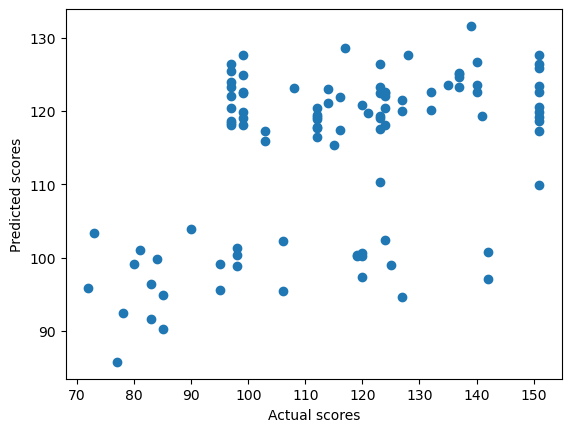

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

# Load the data from CSV file
df = pd.read_csv("modified_questionnaire.csv")

# Convert Project name column into numerical values using one-hot encoding
onehot_encoder = OneHotEncoder(sparse=False)
onehot_encoded = onehot_encoder.fit_transform(df[['Project name']])
df = df.drop(['Project name'], axis=1)
df = pd.concat([df, pd.DataFrame(onehot_encoded)], axis=1)

# Split the data into training and testing sets
X = df.drop(['Participant name', 'Total Score extended'], axis=1)
y = df['Total Score extended']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Print the model coefficients
print("Coefficients: ", regressor.coef_)

# Predict on the test set and calculate mean squared error and R^2 score
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean squared error: ", mse)
print("R^2 score: ", r2)

# Plot predicted vs. actual scores
plt.scatter(y_test, y_pred)
plt.xlabel("Actual scores")
plt.ylabel("Predicted scores")
plt.show()


Coefficients:  [-3.21078738e+02  2.23198133e+01 -1.65705939e+02 -1.45015945e+02
 -1.21986439e-01 -2.63653062e-01  1.47065477e-01 -2.66681992e-02
  6.08039924e-02  2.03130728e-01 -5.83835605e+00 -3.40702515e+00
  3.69967249e+02  2.90604975e+02]
Mean squared error:  413.9727275915061
R^2 score:  0.06280528735393454


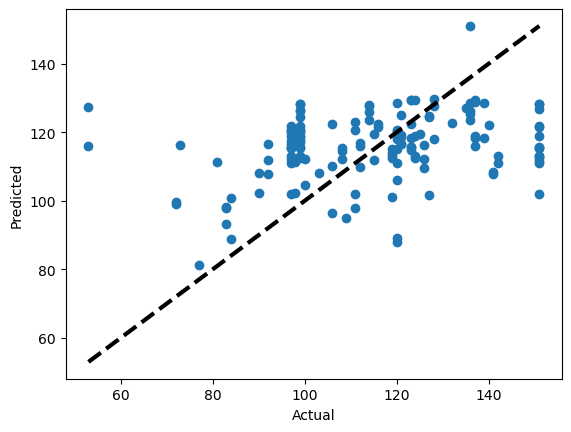

In [4]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Load data from CSV file
df = pd.read_csv('modified_questionnaire.csv')

# Select the relevant columns as features
features = ['Gaze point left X (MCSnorm)', 'Gaze point left Y (MCSnorm)', 'Gaze point right X (MCSnorm)', 'Gaze point right Y (MCSnorm)', 'Gaze point X', 'Gaze point Y', 'Gaze point left X', 'Gaze point left Y', 'Gaze point right X', 'Gaze point right Y', 'Pupil diameter left', 'Pupil diameter right', 'Gaze point X (MCSnorm)', 'Gaze point Y (MCSnorm)']
X = df[features].values

# Use "Total Score extended" column as target variable
y = df['Total Score extended'].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Coefficients: ', model.coef_)
print('Mean squared error: ', mse)
print('R^2 score: ', r2)

# Plot actual vs predicted values
plt.scatter(y_test, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

## Finding correlation values

In [5]:
# Load data from CSV file
df = pd.read_csv('modified_questionnaire.csv')

# Compute the correlation coefficients
corr_coeffs = df.corr()['Total Score extended']

# Print the results
print(corr_coeffs)

Gaze point left X (MCSnorm)     0.029610
Gaze point left Y (MCSnorm)     0.203645
Gaze point right X (MCSnorm)   -0.016069
Gaze point right Y (MCSnorm)    0.218380
Gaze point X                    0.035156
Gaze point Y                    0.086241
Gaze point left X               0.057869
Gaze point left Y               0.081347
Gaze point right X             -0.018483
Gaze point right Y              0.105493
Pupil diameter left            -0.247922
Pupil diameter right           -0.261213
Gaze point X (MCSnorm)          0.017614
Gaze point Y (MCSnorm)          0.215892
Total Score extended            1.000000
Name: Total Score extended, dtype: float64


## Find r2 values and determining the best model intial stage 

In [6]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Load data from CSV file
df = pd.read_csv('modified_questionnaire.csv')

# Select the relevant columns as features
features = ['Gaze point left X (MCSnorm)', 'Gaze point left Y (MCSnorm)', 'Gaze point right X (MCSnorm)', 'Gaze point right Y (MCSnorm)', 'Gaze point X', 'Gaze point Y', 'Gaze point left X', 'Gaze point left Y', 'Gaze point right X', 'Gaze point right Y', 'Pupil diameter left', 'Pupil diameter right', 'Gaze point X (MCSnorm)', 'Gaze point Y (MCSnorm)']

# Split data based on Project name type
project_names = df['Project name'].unique()
for project_name in project_names:
    project_df = df[df['Project name'] == project_name]
    X = project_df[features].values
    y = project_df['Total Score extended'].values

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

    # Train different regression models
    models = [
        ('Linear Regression', LinearRegression()),
        ('Ridge Regression', Ridge(alpha=0.5)),
        ('Lasso Regression', Lasso(alpha=0.1)),
        ('Decision Tree Regression', DecisionTreeRegressor(max_depth=3)),
        ('Random Forest Regression', RandomForestRegressor(n_estimators=100, max_depth=3))
    ]
    for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        print(f"{project_name} - {name} - Mean squared error: {mse:.2f}, R^2 score: {r2:.2f}")

    # Find the best model and features for prediction
    best_model = None
    best_mse = float('inf')
    best_r2 = float('-inf')
    best_features = None
    for name, model in models:
        model.fit(X, y)
        y_pred = model.predict(X)
        mse = mean_squared_error(y, y_pred)
        r2 = r2_score(y, y_pred)
        if mse < best_mse:
            best_mse = mse
            best_r2 = r2
            best_model = name
            best_features = features
    print(f"{project_name} - Best Model: {best_model}, Best Features: {best_features}, Mean squared error: {best_mse:.2f}, R^2 score: {best_r2:.2f}")

    # Predict empathy score for each participant and find the best participant
    participants = project_df['Participant name'].unique()
    best_participant = None
    best_empathy_score = float('-inf')
    for participant in participants:
        participant_df = project_df[project_df['Participant name'] == participant]
        X = participant_df[best_features].values
        y_pred = model.predict(X)


Test group experiment - Linear Regression - Mean squared error: 292.67, R^2 score: -0.08
Test group experiment - Ridge Regression - Mean squared error: 274.31, R^2 score: -0.01
Test group experiment - Lasso Regression - Mean squared error: 274.75, R^2 score: -0.01
Test group experiment - Decision Tree Regression - Mean squared error: 352.30, R^2 score: -0.30
Test group experiment - Random Forest Regression - Mean squared error: 325.63, R^2 score: -0.20
Test group experiment - Best Model: Random Forest Regression, Best Features: ['Gaze point left X (MCSnorm)', 'Gaze point left Y (MCSnorm)', 'Gaze point right X (MCSnorm)', 'Gaze point right Y (MCSnorm)', 'Gaze point X', 'Gaze point Y', 'Gaze point left X', 'Gaze point left Y', 'Gaze point right X', 'Gaze point right Y', 'Pupil diameter left', 'Pupil diameter right', 'Gaze point X (MCSnorm)', 'Gaze point Y (MCSnorm)'], Mean squared error: 258.16, R^2 score: 0.12
Control group experiment - Linear Regression - Mean squared error: 509.89, R^

G:\Python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.854e+00, tolerance: 5.844e+00
  model = cd_fast.enet_coordinate_descent(


Control group experiment - Best Model: Random Forest Regression, Best Features: ['Gaze point left X (MCSnorm)', 'Gaze point left Y (MCSnorm)', 'Gaze point right X (MCSnorm)', 'Gaze point right Y (MCSnorm)', 'Gaze point X', 'Gaze point Y', 'Gaze point left X', 'Gaze point left Y', 'Gaze point right X', 'Gaze point right Y', 'Pupil diameter left', 'Pupil diameter right', 'Gaze point X (MCSnorm)', 'Gaze point Y (MCSnorm)'], Mean squared error: 178.57, R^2 score: 0.57


## display which participant has the most empathy score

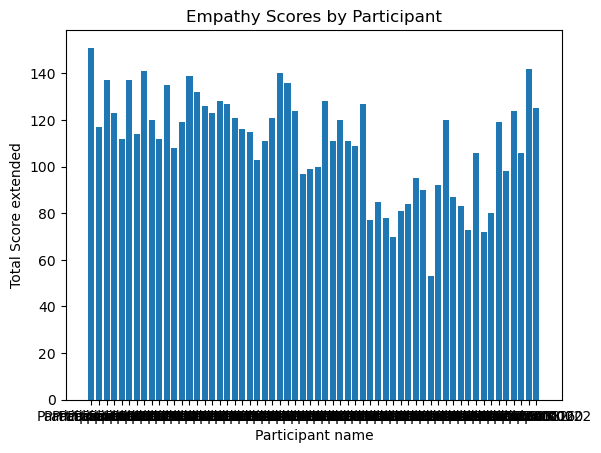

In [7]:
# Load the data
df = pd.read_csv('modified_questionnaire.csv')

# Create a bar plot of the empathy scores
plt.bar(df['Participant name'], df['Total Score extended'])

# Set the title and axis labels
plt.title('Empathy Scores by Participant')
plt.xlabel('Participant name')
plt.ylabel('Total Score extended')

# Show the plot
plt.show()

## Finding the best feature to predict score

Accuracy: 0.07373549756152953


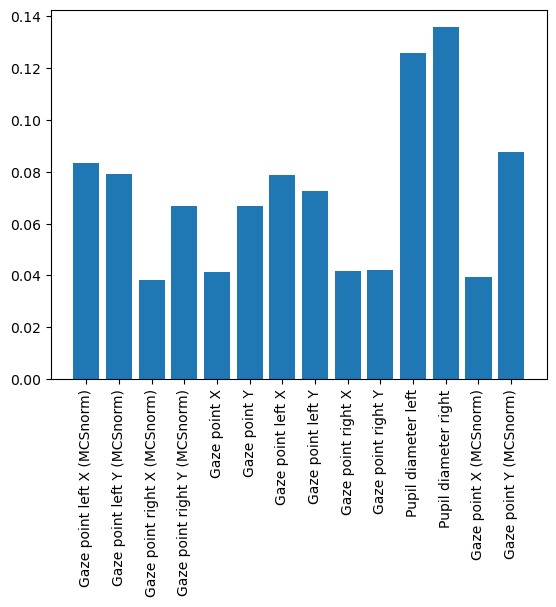

In [8]:
# Load the data
df = pd.read_csv("modified_questionnaire.csv")

# Drop the "Project name" and "Participant name" columns
df = df.drop(["Project name", "Participant name"], axis=1)

# Split the data into training and testing sets
X = df.drop("Total Score extended", axis=1)
y = df["Total Score extended"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on the test data
y_pred = rf.predict(X_test)

# Calculate the accuracy of the model
accuracy = rf.score(X_test, y_test)
print("Accuracy:", accuracy)

# Plot a bar chart of feature importances
importances = rf.feature_importances_
features = X.columns
plt.bar(features, importances)
plt.xticks(rotation=90)
plt.show()


## Apply different models to calculate score

In [10]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Load the data
df = pd.read_csv('modified_questionnaire.csv')

# Add 'Participant' prefix to participant names
df.loc[df['Participant name'] == '13', 'Participant name'] = 'Participant0013'

# Split data into test and train
test_participant = 'Participant0013'
test_data = df[df['Participant name'] == test_participant]
train_data = df[df['Participant name'] != test_participant]

# Select features and target variable
features = ['Pupil diameter right']
target = 'Total Score extended'

# Split into X and y train and test
X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]

# Create regression models
linear_reg = LinearRegression()
ridge_reg = Ridge(alpha=0.5)
lasso_reg = Lasso(alpha=0.1)
elastic_net_reg = ElasticNet(alpha=0.1, l1_ratio=0.5)
tree_reg = DecisionTreeRegressor()
forest_reg = RandomForestRegressor()

# Train the regression models using cross validation
models = [linear_reg, ridge_reg, lasso_reg, elastic_net_reg, tree_reg, forest_reg]
mse_scores = []

for model in models:
    mse = np.sqrt(-cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=10))
    mse_scores.append(mse.mean())
    print(type(model).__name__, "MSE:", mse.mean())

# Find the best model based on the mean squared error
best_model_idx = np.argmin(mse_scores)
best_model = models[best_model_idx]
print("\nBest model:", type(best_model).__name__)


LinearRegression MSE: 19.505161400640034
Ridge MSE: 19.50635525772148
Lasso MSE: 19.527616738618683
ElasticNet MSE: 19.582699015739188
DecisionTreeRegressor MSE: 27.719142743163417
RandomForestRegressor MSE: 24.537347347428486

Best model: LinearRegression
